In [152]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [153]:
# Download dataset
!wget https://raw.githubusercontent.com/ShawnASC5/Student-Performance-Factors/refs/heads/main/dataset.csv

--2025-02-18 02:42:35--  https://raw.githubusercontent.com/ShawnASC5/Student-Performance-Factors/refs/heads/main/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 470858 (460K) [text/plain]
Saving to: ‘dataset.csv.3’

dataset.csv.3       100%[===================>] 459.82K  --.-KB/s    in 0.05s   

2025-02-18 02:42:35 (9.15 MB/s) - ‘dataset.csv.3’ saved [470858/470858]




**Overview:**

This dataset contains data from a higher education institution on various variables related to undergraduate students, including demographics, social-economic factors, and academic performance, to investigate the impact of these factors on student dropout and academic success.

- For some reason, the Dataset labled some columns as "Categorical", but when we looked at the Data by column, it had entirely all numbers, so we had to do seperate research to find out what each number meant (See Image Below for Example).




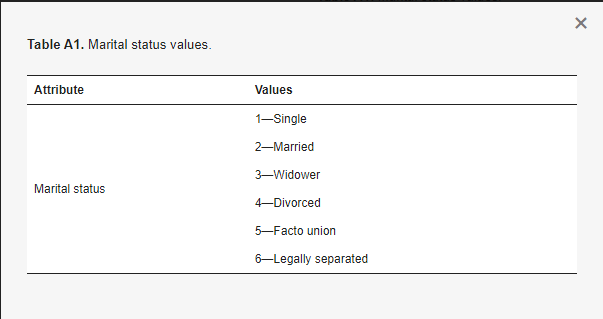

In [154]:
#Upload dataset
df_factors = pd.read_csv("dataset.csv")

#get dataset information
df_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [155]:
# clean data
# step 1. check duplicate data
df_factors.duplicated().sum()

0

In [156]:
# step 2. check null
# how should we deal with the null?
print("\nNull values per column:")
print(df_factors.isnull().sum())
# We can also see all available columns


Null values per column:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                          

In [157]:
df_factors.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [158]:
#See how many values are in our Target column
df_factors["Target"].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


# Target Column:
After Preprocessing our data we verified the values in our Target column and we found that it has Three values that consist of "Graduate", "Dropout", and Enrolled", this is important information to identify which one of these values we will target. We then proceed to Hot Encode the Target column to split these values in separate columns



In [159]:
# One-Hot Encoding

df_factors_encoded = pd.get_dummies(df_factors)

correlation_matrix = df_factors_encoded.corr()
#See new columns added as a result of Hot encoding
df_factors_encoded


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0.000000,0,10.8,1.4,1.74,True,False,False
1,1,6,1,11,1,1,1,1,3,4,...,6,6,13.666667,0,13.9,-0.3,0.79,False,False,True
2,1,1,5,5,1,1,1,22,27,10,...,0,0,0.000000,0,10.8,1.4,1.74,True,False,False
3,1,8,2,15,1,1,1,23,27,6,...,10,5,12.400000,0,9.4,-0.8,-3.12,False,False,True
4,2,12,1,3,0,1,1,22,28,10,...,6,6,13.000000,0,13.9,-0.3,0.79,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,8,5,12.666667,0,15.5,2.8,-4.06,False,False,True
4420,1,1,2,15,1,1,19,1,1,10,...,6,2,11.000000,0,11.1,0.6,2.02,True,False,False
4421,1,1,1,12,1,1,1,22,27,10,...,9,1,13.500000,0,13.9,-0.3,0.79,True,False,False
4422,1,1,1,9,1,1,1,22,27,8,...,6,5,12.000000,0,9.4,-0.8,-3.12,False,False,True


# Correlation Matrix: Dropouts Analysis

- "Age at Enrollment": This feature has the highest positive correlation with dropping out. This indicates that older students may face unique challenges that contribute to a higher likelihood of dropping out. Possible factors could include balancing studies with work or family responsibilities.

- "Debtor": A moderately positive correlation suggests that financial debt is a significant risk factor for dropout. This emphasizes the importance of financial aid programs or counseling to support students at risk.

- "Gender": A positive correlation of 0.2 indicates that gender might play a role in dropout rates. Understanding whether societal, cultural, or institutional factors contribute to this difference can help address disparities.

- "Scholarship Holder": A negative correlation with dropouts implies that scholarships may act as a protective factor against dropping out. This underscores the importance of providing financial incentives and support systems.

- "Curricular Units Approved": Strong negative correlations with dropouts suggest that academic performance, measured by the number of units approved, is a key determinant of persistence in studies. Students struggling academically might benefit from targeted interventions like tutoring or mentoring.

- "Tuition Fees Up to Date": A negative correlation suggests that students who are financially up-to-date with their tuition are less likely to drop out. This further highlights the importance of financial stability for academic success.

- "Target_Graduate": As expected, a strong negative correlation with Target_Dropout reflects the natural inverse relationship between graduation and dropout rates.

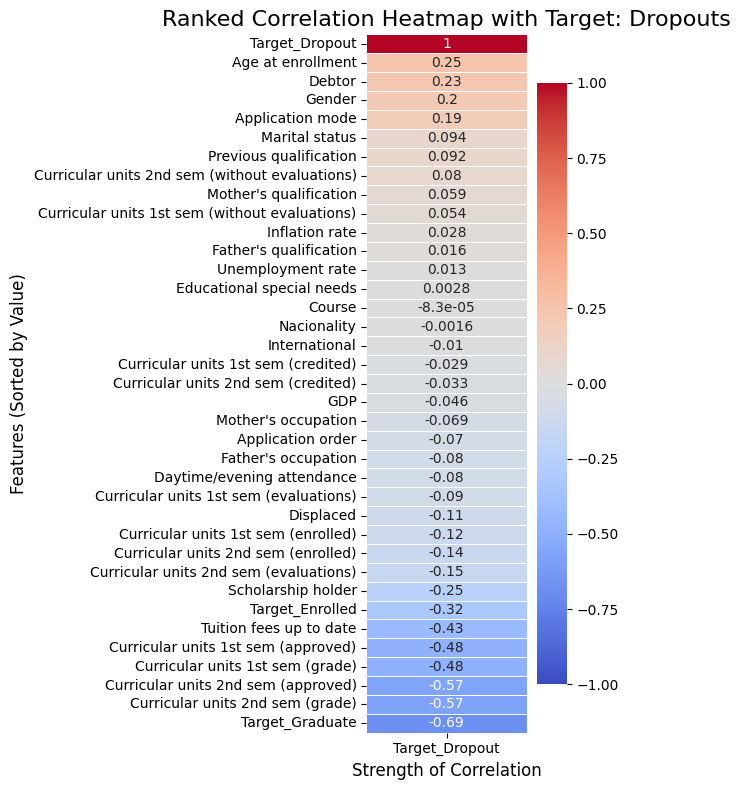

In [160]:
# Sort the correlation coefficients with the target variable Target_Dropout in descending order,
# and visualize the strength of correlations using a heatmap.

sorted_corr = correlation_matrix[['Target_Dropout']].sort_values(
    by='Target_Dropout', ascending=False
)

plt.figure(figsize=(6, 8))
sns.heatmap(
    sorted_corr,
    annot=True,
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    vmin=-1,
    vmax=1
)


plt.title("Ranked Correlation Heatmap with Target: Dropouts", fontsize=16)
plt.xlabel("Strength of Correlation", fontsize=12)
plt.ylabel("Features (Sorted by Value)", fontsize=12)
plt.tight_layout()
plt.show()


**Age at Enrollment Analysis**

- The highest dropout probability (0.575) is observed in the 26–35 age group. This suggests that students in this age range may face significant challenges, possibly due to external factors like balancing education with work or family responsibilities.

- Decreasing Dropout Probability for Younger and Older Groups, The 15–25 age group has the lowest dropout probability (0.247), indicating that younger students may have fewer external commitments and can focus more on their education.
Interestingly, older students (46–55 and 56–65) show slightly lower dropout probabilities compared to the 26–35 age group, which might indicate higher motivation or stability among this demographic.

- Stable Dropout Trends Beyond Age 36: The dropout probabilities for age groups 36–45, 46–55, and 56–65 remain consistent around 50%, possibly reflecting a plateau effect in the challenges faced by these groups.


Value counts for 'Target_Dropout':
Target_Dropout
False    3003
True     1421
Name: count, dtype: int64
----------------------------------------
Mean dropout probability per Age Bin:
         Dropout Probability
Age Bin                     
15-25               0.247706
26-35               0.575804
36-45               0.523297
46-55               0.550000
56-65               0.500000
----------------------------------------


<ipython-input-161-ea2c5e6915f6>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_probabilities = binned_data.groupby("Age Bin").mean()


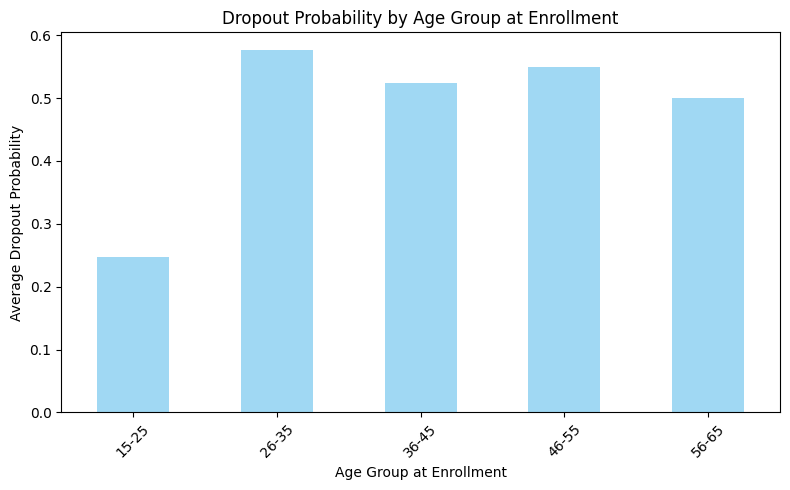

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate "Target_Dropout" based on other target columns
df_factors_encoded["Target_Dropout"] = (
    (~df_factors_encoded["Target_Enrolled"]) & (~df_factors_encoded["Target_Graduate"])
).astype(bool)  # Convert to True/False instead of 1/0

# Verify the generated "Target_Dropout" column
print("Value counts for 'Target_Dropout':")
print(df_factors_encoded["Target_Dropout"].value_counts())
print("-" * 40)

# Step 2: Bin "Age at enrollment" into age groups
age_bins = pd.cut(
    df_factors_encoded["Age at enrollment"],
    bins=[15, 25, 35, 45, 55, 65],
    labels=["15-25", "26-35", "36-45", "46-55", "56-65"]
)

# Step 3: Create a DataFrame for grouping
binned_data = pd.DataFrame({
    "Age Bin": age_bins,
    "Dropout Probability": df_factors_encoded["Target_Dropout"].astype(int)  # Convert back to int for calculations
})

# Step 4: Group by "Age Bin" and calculate the mean dropout probability
mean_probabilities = binned_data.groupby("Age Bin").mean()

# Verify the results
print("Mean dropout probability per Age Bin:")
print(mean_probabilities)
print("-" * 40)

# Step 5: Plot the results
plt.figure(figsize=(8, 5))
mean_probabilities["Dropout Probability"].plot(kind='bar', color='#89CFF0', alpha=0.8)

plt.ylabel("Average Dropout Probability")
plt.xlabel("Age Group at Enrollment")
plt.title("Dropout Probability by Age Group at Enrollment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Day/Evening attendance analisys**

- Daytime students tend to graduate more, the category is basically dominated by daytime students, Evening students graduate less which shows that evening students face challanges in completing their studies.
- Evening students have a higher dropout rate, since they have more presence there than in the Graduate.
- Gender seem to be less prominent when it comes to dropping out both males and females have similar patterns when it comes to dropping out, however, when it comes to graduating, females have way higher count of graduates.

<Figure size 800x500 with 0 Axes>

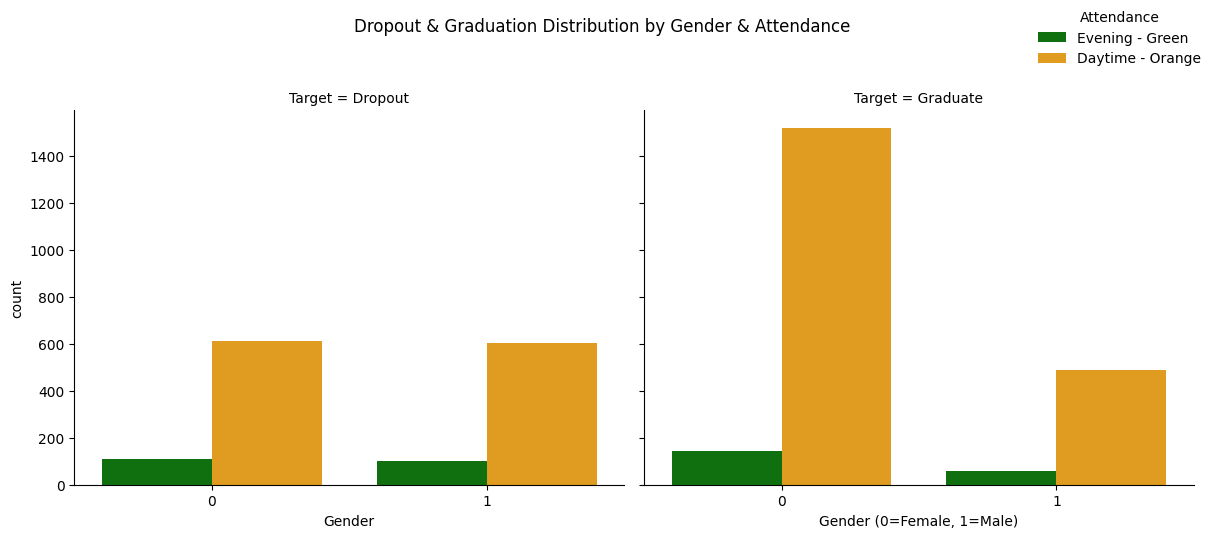

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df_factors[df_factors["Target"].isin(["Dropout", "Graduate"])]


# Creating the updated visualization
plt.figure(figsize=(8, 5))
g = sns.catplot(x="Gender", hue="Daytime/evening attendance", col="Target",
                data=df_filtered, kind="count", palette=["green", "orange"], height=5, aspect=1)

# Manually setting the correct legend
g._legend.set_title("Attendance")
g._legend.set_bbox_to_anchor((1, 1))  # Adjust position if needed
g._legend.texts[0].set_text("Evening - Green")
g._legend.texts[1].set_text("Daytime - Orange")

# Removing Seaborn's default legend from the plot
plt.legend([], [], frameon=False)

plt.suptitle("Dropout & Graduation Distribution by Gender & Attendance", y=1.05)
plt.xlabel("Gender (0=Female, 1=Male)")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()


**Day/Evening Students by Age Groups**

- Younger students attendend more daytime classes specifcally the 15-25 bin, this can relate to the younger students having less external responsabilities.
- Evening Studies is more common for older students, it increases with in ratio with age, probably related to those external responsabilities.
- Enrollment declines sharply after 35, education is pursued by younger folks as opposed to those older, this could suggest a barrier of entry or lack of necessity to pursue college.

<ipython-input-163-f0178466ccd1>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendance_distribution = binned_data.groupby(["Age Bin", "Daytime Attendance"]).size().unstack()


<Figure size 1000x600 with 0 Axes>

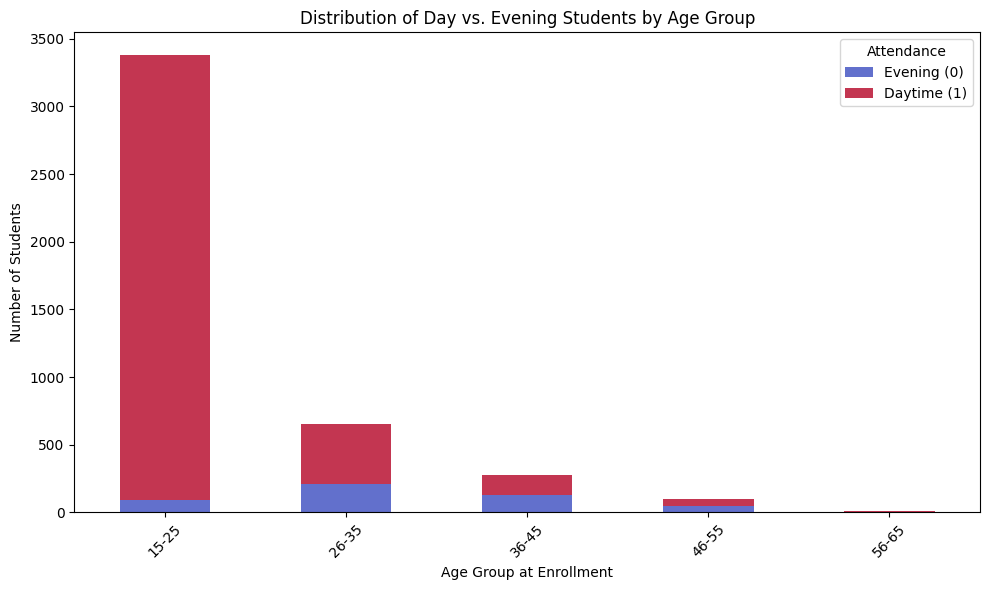

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reusing the age binning strategy from previous analysis
age_bins = pd.cut(
    df_factors_encoded["Age at enrollment"],
    bins=[15, 25, 35, 45, 55, 65],
    labels=["15-25", "26-35", "36-45", "46-55", "56-65"]
)

# Creating a DataFrame with Age Bin and Attendance type
binned_data = pd.DataFrame({
    "Age Bin": age_bins,
    "Daytime Attendance": df_factors_encoded["Daytime/evening attendance"]  # 1=Daytime, 0=Evening
})

# Counting students per age group for Daytime and Evening study
attendance_distribution = binned_data.groupby(["Age Bin", "Daytime Attendance"]).size().unstack()

# Plotting the distribution of Day vs. Evening students by age group
plt.figure(figsize=(10, 6))
attendance_distribution.plot(kind="bar", stacked=True, colormap="coolwarm", alpha=0.8, figsize=(10, 6))

# Formatting the plot
plt.xlabel("Age Group at Enrollment")
plt.ylabel("Number of Students")
plt.title("Distribution of Day vs. Evening Students by Age Group")
plt.legend(title="Attendance", labels=["Evening (0)", "Daytime (1)"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [164]:
df_factors_encoded

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0.000000,0,10.8,1.4,1.74,True,False,False
1,1,6,1,11,1,1,1,1,3,4,...,6,6,13.666667,0,13.9,-0.3,0.79,False,False,True
2,1,1,5,5,1,1,1,22,27,10,...,0,0,0.000000,0,10.8,1.4,1.74,True,False,False
3,1,8,2,15,1,1,1,23,27,6,...,10,5,12.400000,0,9.4,-0.8,-3.12,False,False,True
4,2,12,1,3,0,1,1,22,28,10,...,6,6,13.000000,0,13.9,-0.3,0.79,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,8,5,12.666667,0,15.5,2.8,-4.06,False,False,True
4420,1,1,2,15,1,1,19,1,1,10,...,6,2,11.000000,0,11.1,0.6,2.02,True,False,False
4421,1,1,1,12,1,1,1,22,27,10,...,9,1,13.500000,0,13.9,-0.3,0.79,True,False,False
4422,1,1,1,9,1,1,1,22,27,8,...,6,5,12.000000,0,9.4,-0.8,-3.12,False,False,True


**Debt Impact Analysis**

- Higher Dropout Proportion Among Students in Debt: Students with debt have a significantly higher dropout proportion. This suggests that financial instability is a key factor contributing to students leaving their studies.

- Lower Dropout Proportion for Students Without Debt: Students with no debt exhibit a much lower dropout proportion. This indicates that financial stability is likely a protective factor against dropping out.

- Financial Support as a Critical Factor: The stark difference in dropout proportions between the two groups highlights the potential importance of financial aid programs or debt counseling to support students at risk of dropping out due to financial constraints.

<ipython-input-165-7e06b998148c>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dropout_proportions = debtor_group.apply(lambda x: (x["Target_Dropout"]).mean())


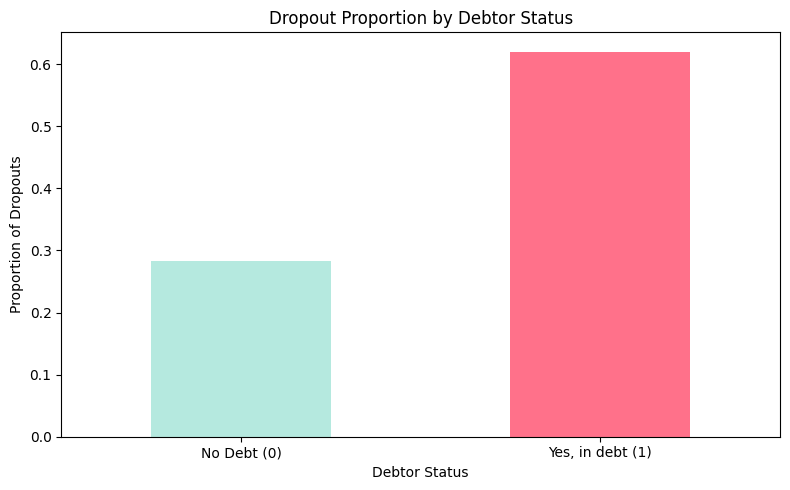

In [165]:
# Assuming your DataFrame is called df_factors
# Replace "Debtor" and "Target" with your actual column names

# Grouping data by the "Debtor" column
debtor_group = df_factors_encoded.groupby("Debtor")

# Calculating dropout proportions for debtors and non-debtors
dropout_proportions = debtor_group.apply(lambda x: (x["Target_Dropout"]).mean())

# Plotting a bar chart
plt.figure(figsize=(8, 5))
dropout_proportions.plot(kind='bar', color=['#A3E4D7', '#FF4D6D'], alpha=0.8)
plt.ylabel("Proportion of Dropouts")
plt.xlabel("Debtor Status")
plt.title("Dropout Proportion by Debtor Status")
plt.xticks(ticks=[0, 1], labels=["No Debt (0)", "Yes, in debt (1)"], rotation=0)
plt.tight_layout()
plt.show()


**Effects of Gender in dropouts, analysis**

- Higher Dropout Proportion Among Males: Males (Gender = 1) have a significantly higher dropout proportion compared to females (Gender = 0). This suggests that male students may face more challenges or external factors that contribute to dropping out.

- Lower Dropout Proportion for Females: Females exhibit a much lower dropout proportion. This may indicate better academic performance, stronger support systems, or other factors that contribute to persistence in their studies.
Gender-Specific Factors:

- The noticeable difference in dropout rates between genders highlights the importance of exploring potential causes. This might include differences in societal expectations, learning environments, or access to resources.

<ipython-input-166-b00fdf7502e8>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gender_dropout_proportions = gender_group.apply(lambda x: (x["Target_Dropout"]).mean())


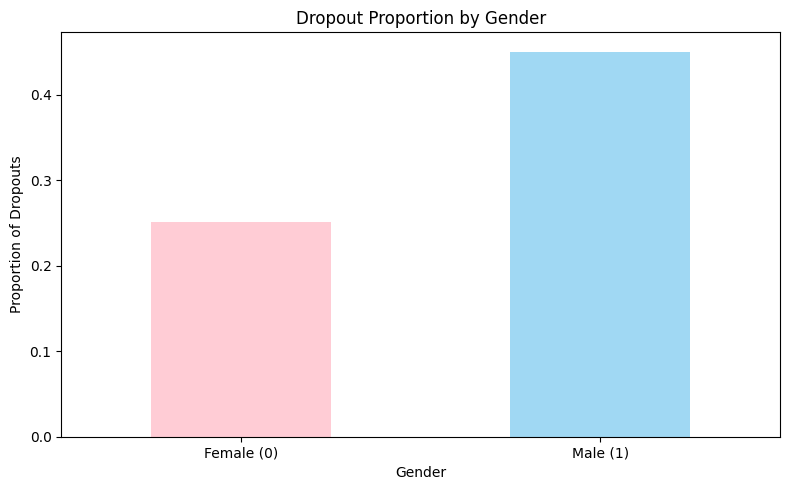

In [166]:
# Grouping data by the "Gender" column
gender_group = df_factors_encoded.groupby("Gender")

# Calculating dropout proportions for each gender
gender_dropout_proportions = gender_group.apply(lambda x: (x["Target_Dropout"]).mean())

# Plotting a bar chart
plt.figure(figsize=(8, 5))
gender_dropout_proportions.plot(kind='bar', color=['pink', '#89CFF0'], alpha=0.8)
plt.ylabel("Proportion of Dropouts")
plt.xlabel("Gender")
plt.title("Dropout Proportion by Gender")
plt.xticks(ticks=[0, 1], labels=["Female (0)", "Male (1)"], rotation=0)
plt.tight_layout()
plt.show()


**Dropouts in proportion to Tuition Fees Status**

- High Dropout Proportion for Students Not Up-to-Date on Tuition: Students whose tuition fees are not up to date have a very high dropout proportion, exceeding 80%. This highlights that financial difficulties and unpaid fees are strongly associated with students leaving their studies.

- Low Dropout Proportion for Students Up-to-Date on Tuition: Students who have their tuition fees up-to-date exhibit a much lower dropout proportion (below 20%). This suggests that financial stability is a protective factor against dropping out.

- Clear Financial Barrier to Academic Success: The stark difference between the two groups underscores the critical role that financial factors play in student retention. Ensuring students can meet their financial obligations may directly reduce dropout rates.


<ipython-input-167-ef1935dd417a>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dropout_proportions = fees_group.apply(lambda x: (x["Target_Dropout"]).mean())


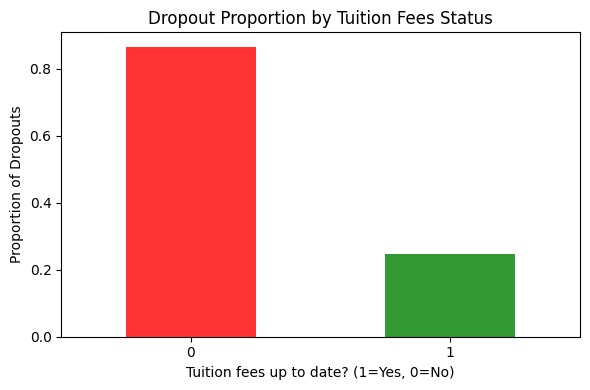

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping data by "Tuition fees up to date"
fees_group = df_factors_encoded.groupby("Tuition fees up to date")

# Calculating dropout proportions for each fee status
dropout_proportions = fees_group.apply(lambda x: (x["Target_Dropout"]).mean())

# Plotting a bar chart
plt.figure(figsize=(6, 4))
dropout_proportions.plot(kind='bar', color=['red', 'green'], alpha=0.8)
plt.title("Dropout Proportion by Tuition Fees Status")
plt.xlabel("Tuition fees up to date? (1=Yes, 0=No)")
plt.ylabel("Proportion of Dropouts")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


 **Analysis of the Relationship Between Tuition Fee Status and Dropout Rates**

Key takeaways are:

Students with tuition fees up to date (1=Yes):
*   The majority of students in this category did not drop out (75.3%).
*   A smaller proportion of these students dropped out (24.7%).



Students with tuition fees not up to date (0=No):
*   The majority of students in this category dropped out (86.6%).
*   Only a small proportion of these students did not drop out (13.4%).


Tuition fee status is strongly associated with dropout rates:

*   Students who keep their tuition fees up to date are significantly likely to drop out.less
*   Students who do not keep their tuition fees up to date have a very high dropout rate.

***Implications:***

Financial stability: Ensuring tuition fees are up to date may reflect a student's financial stability or their ability to continue their studies without external challenges

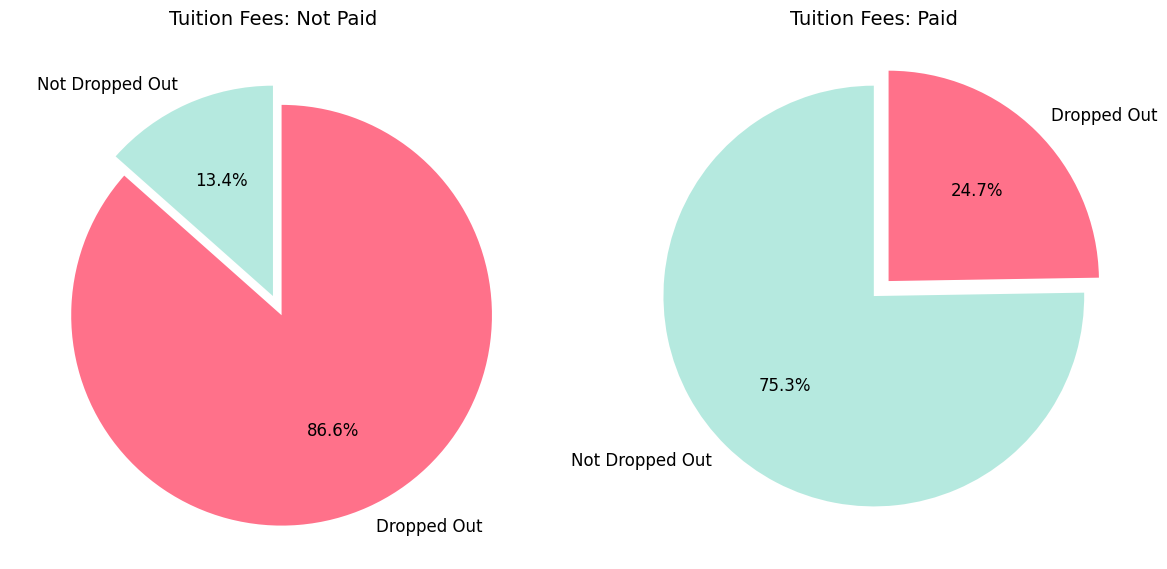

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab for Tuition fees vs. Target_Dropout
ct = pd.crosstab(df_factors_encoded["Tuition fees up to date"], df_factors_encoded["Target_Dropout"])

# Define colors and explode for better visualization
colors = ['#A3E4D7', '#FF4D6D']
explode = (0, 0.1)  # Slightly separate "Dropped Out"

# Create a subplot with 1 row and 2 columns for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Loop through each row in the crosstab and create a pie chart
for i, (index, row) in enumerate(ct.iterrows()):
    labels = ["Not Dropped Out", "Dropped Out"]
    sizes = row

    # Plot pie chart in the appropriate subplot
    axes[i].pie(
        sizes,
        labels=labels,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors,
        explode=explode,
        wedgeprops={"alpha": 0.8},
        textprops={"fontsize": 12},
    )

    # Add title for each subplot
    axes[i].set_title(f"Tuition Fees: {'Paid' if index == 1 else 'Not Paid'}", fontsize=14)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()



**Key Takeaways from tuition fees and age group in relation to dropout status**

- Unpaid Tuition as a Major Risk Factor: Regardless of age, students with unpaid tuition are significantly more likely to drop out.

- Additional Challenges for Older Students: Even when tuition is paid, dropout rates increase slightly for older age groups, highlighting the need for tailored support.

<ipython-input-169-13e639f4f42a>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_factors_encoded.groupby(["Tuition fees up to date", age_bins])["Target_Dropout"].mean().unstack(0)


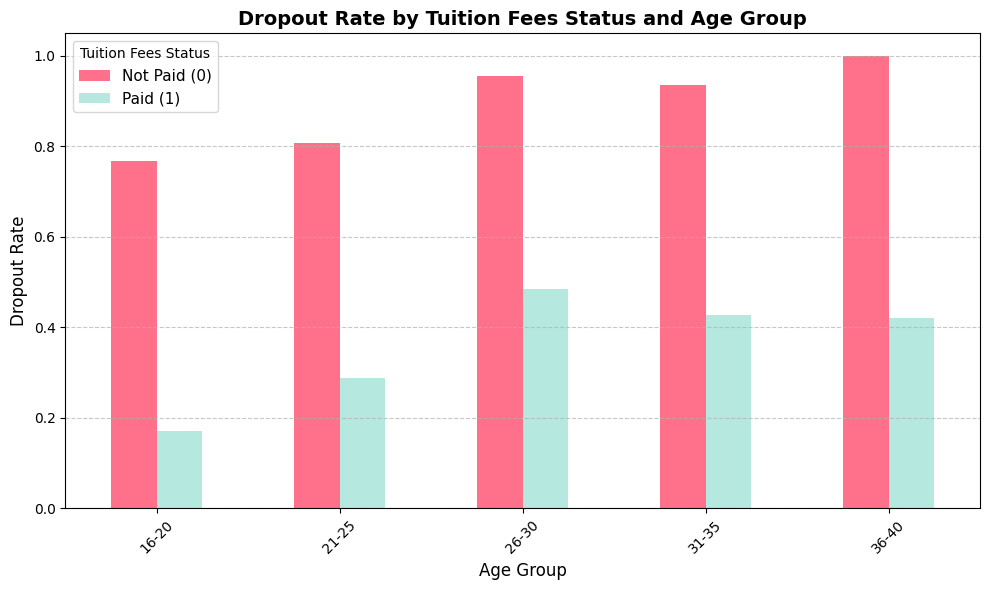

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Bin age into groups for better analysis
age_bins = pd.cut(
    df_factors_encoded["Age at enrollment"],
    bins=[16, 20, 25, 30, 35, 40],
    labels=["16-20", "21-25", "26-30", "31-35", "36-40"]
)

# Step 2: Group data by "Tuition fees up to date" and age bins, then calculate the mean dropout rate
grouped = df_factors_encoded.groupby(["Tuition fees up to date", age_bins])["Target_Dropout"].mean().unstack(0)

# Step 3: Define custom colors for better visualization
colors = ['#FF4D6D', '#A3E4D7']

# Step 4: Plot the grouped bar chart
grouped.plot(kind="bar", figsize=(10, 6), alpha=0.8, color=colors)

# Step 5: Customize chart labels and appearance
plt.title("Dropout Rate by Tuition Fees Status and Age Group", fontsize=14, fontweight='bold')
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Dropout Rate", fontsize=12)
plt.legend(["Not Paid (0)", "Paid (1)"], title="Tuition Fees Status", fontsize=11)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better readability
plt.tight_layout()

# Step 6: Show the plot
plt.show()


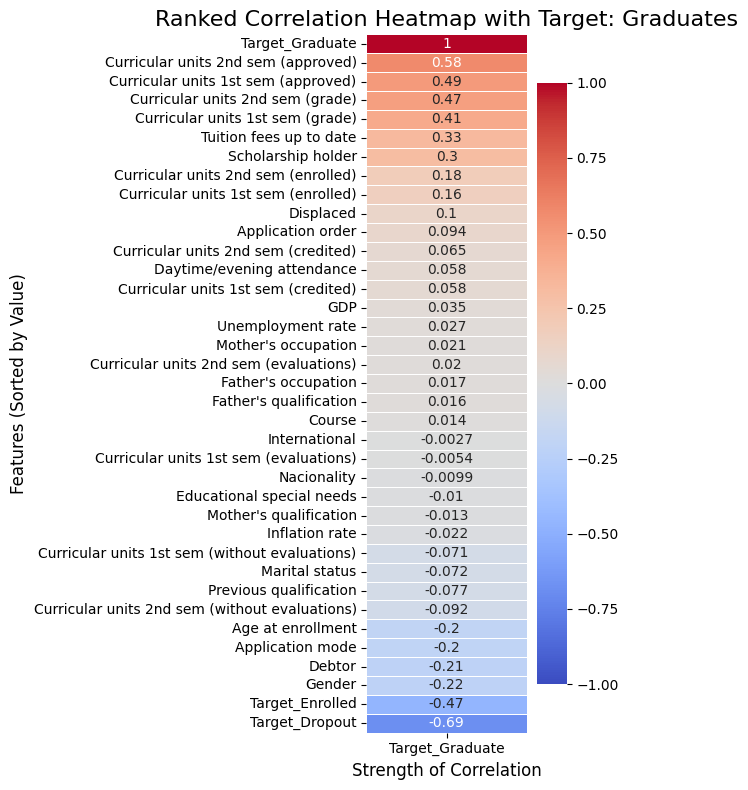

In [170]:
# Sort the correlation coefficients with the target variable Target_Graduate in descending order,
# and visualize the strength of correlations using a heatmap.

sorted_corr = correlation_matrix[['Target_Graduate']].sort_values(
    by='Target_Graduate', ascending=False
)


plt.figure(figsize=(6, 8))
sns.heatmap(
    sorted_corr,
    annot=True,
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    vmin=-1,
    vmax=1
)

plt.title("Ranked Correlation Heatmap with Target: Graduates", fontsize=16)
plt.xlabel("Strength of Correlation", fontsize=12)
plt.ylabel("Features (Sorted by Value)", fontsize=12)
plt.tight_layout()
plt.show()


**Impact of Scholarships:**


*   Students with scholarships have significantly higher graduation rates, especially those in the Scholarship & No Debt group.
*   Scholarships effectively reduce financial pressure, allowing students to focus more on their studies.


**Impact of Debt:**

*   Students with debt have lower graduation rates, particularly those in the No Scholarship & Debt group.
*   Financial pressure from debt has a significant negative impact on students' academic progress.

**Key Takeaways**

*   Whether students receive scholarships and whether they have debt significantly impact graduation rates.
*   Students with scholarships and no debt (Scholarship & No Debt) have the highest graduation rate.
*   Students without scholarships and with debt (No Scholarship & Debt) have the lowest graduation rate.

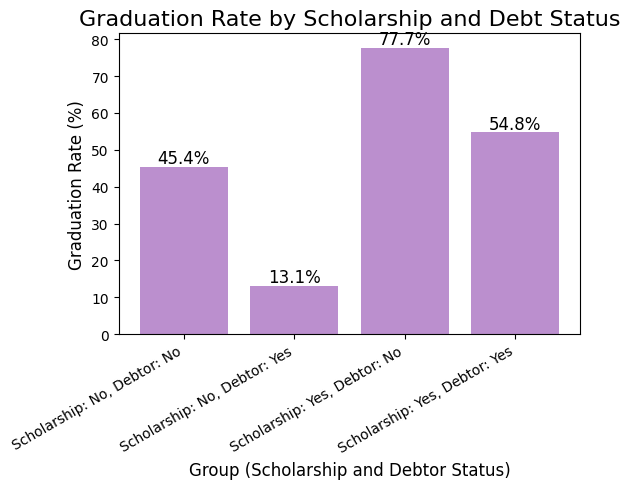

In [171]:
import matplotlib.pyplot as plt

# Create "Group" column temporarily within assign() method
grouped_data = (
    df_factors_encoded
    .assign(
        Group="Scholarship: " + df_factors_encoded["Scholarship holder"].map({1: "Yes", 0: "No"}) +
              ", Debtor: " + df_factors_encoded["Debtor"].map({1: "Yes", 0: "No"})
    )
    .groupby("Group")["Target_Graduate"]
    .mean() * 100
)

plt.figure(figsize=(6, 5))
bars = plt.bar(grouped_data.index, grouped_data.values, color="#bb8fce")

# Add text labels above bars
for bar, value in zip(bars, grouped_data.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f"{value:.1f}%",
        ha="center",
        fontsize=12,
    )

# Formatting
plt.title("Graduation Rate by Scholarship and Debt Status", fontsize=16)
plt.ylabel("Graduation Rate (%)", fontsize=12)
plt.xlabel("Group (Scholarship and Debtor Status)", fontsize=12)
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.tight_layout()

plt.show()


<ipython-input-172-30e36114536e>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data.groupby("Age Bin")["Scholarship"]


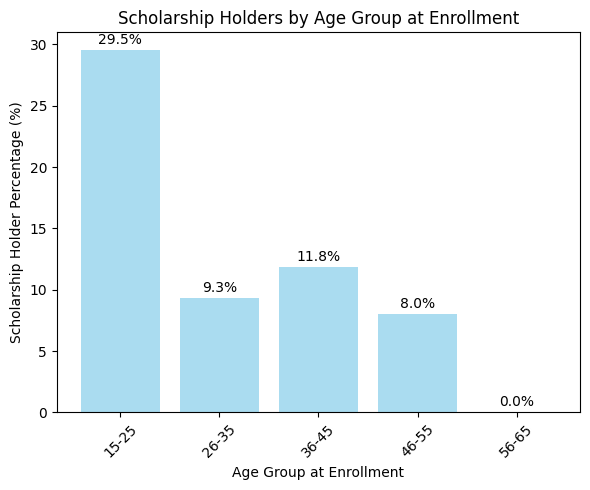

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Bin "Age at enrollment" into age groups
age_bins = pd.cut(
    df_factors_encoded["Age at enrollment"],
    bins=[15, 25, 35, 45, 55, 65],
    labels=["15-25", "26-35", "36-45", "46-55", "56-65"]
)

# Step 2: Create a DataFrame for grouping
binned_data = pd.DataFrame({
    "Age Bin": age_bins,
    "Scholarship": df_factors_encoded["Scholarship holder"]
})

# Step 3: Group by "Age Bin" and calculate the percentage of scholarship holders
scholarship_distribution = (
    binned_data.groupby("Age Bin")["Scholarship"]
    .mean() * 100  # Convert proportion to percentage
)

# Step 4: Plot the results
plt.figure(figsize=(6, 5))
bars = plt.bar(scholarship_distribution.index, scholarship_distribution.values, color="skyblue", alpha=0.7)

# Add text labels above bars
for bar, value in zip(bars, scholarship_distribution.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f"{value:.1f}%",
        ha="center",
        fontsize=10,
    )

# Formatting
plt.ylabel("Scholarship Holder Percentage (%)")
plt.xlabel("Age Group at Enrollment")
plt.title("Scholarship Holders by Age Group at Enrollment")
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


# **Young Age Group Dominates Scholarships:**

The 15-25 age group has the highest percentage of scholarship holders at 29.5%, significantly surpassing all other age groups.
This suggests that younger students are more likely to qualify for or receive scholarships, possibly due to specific eligibility criteria or higher academic engagement at this stage.
Decline in Scholarship Holders with Age:

There is a noticeable drop in the percentage of scholarship holders as the age group increases:
26-35: 9.3%
36-45: 11.8%
46-55: 8.0%
56-65: 0.0%
This pattern could reflect reduced access to scholarships for older students, potentially due to fewer programs targeting non-traditional or returning students.

> Add blockquote



<ipython-input-173-9b4f3aa8fb94>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values_international = binned_data_international.groupby("Age Bin")["Target"].apply(lambda x: (x == target_value).mean())
<ipython-input-173-9b4f3aa8fb94>:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values_non_international = binned_data_non_international.groupby("Age Bin")["Target"].apply(lambda x: (x == target_value).mean())


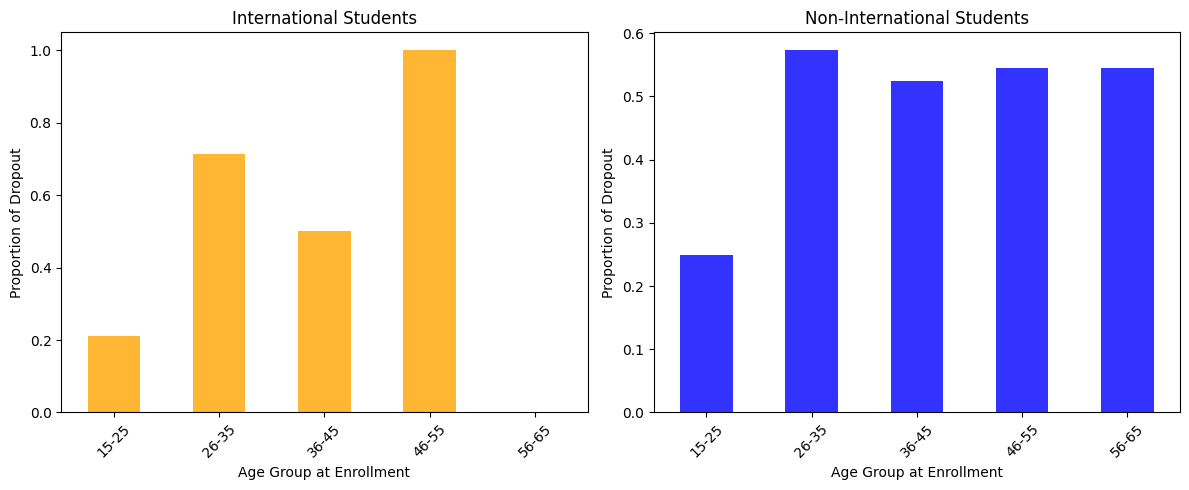

In [173]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter data for international and non-international students
international_students = df_factors[df_factors['International'] == 1]
non_international_students = df_factors[df_factors['International'] == 0]

# Step 2: Bin "Age at enrollment" into age groups
age_bins_international = pd.cut(
    international_students["Age at enrollment"],
    bins=[15, 25, 35, 45, 55, 65],
    labels=["15-25", "26-35", "36-45", "46-55", "56-65"]
)

age_bins_non_international = pd.cut(
    non_international_students["Age at enrollment"],
    bins=[15, 25, 35, 45, 55, 65],
    labels=["15-25", "26-35", "36-45", "46-55", "56-65"]
)

# Step 3: Create DataFrames for grouping
binned_data_international = pd.DataFrame({
    "Age Bin": age_bins_international,
    "Target": international_students["Target"]
})

binned_data_non_international = pd.DataFrame({
    "Age Bin": age_bins_non_international,
    "Target": non_international_students["Target"]
})

#calculated the proportion of a specific target value"Dropout"
# Instead of mean, calculate the proportion of 'Dropout' for each age bin
target_value = "Dropout"  # Choose the target value you want to analyze
mean_values_international = binned_data_international.groupby("Age Bin")["Target"].apply(lambda x: (x == target_value).mean())
mean_values_non_international = binned_data_non_international.groupby("Age Bin")["Target"].apply(lambda x: (x == target_value).mean())


# Step 5: Plot the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
mean_values_international.plot(kind='bar', color='orange', alpha=0.8)
plt.ylabel(f"Proportion of {target_value}")  # Update y-axis label
plt.xlabel("Age Group at Enrollment")
plt.title("International Students")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
mean_values_non_international.plot(kind='bar', color='blue', alpha=0.8)
plt.ylabel(f"Proportion of {target_value}")  # Update y-axis label
plt.xlabel("Age Group at Enrollment")
plt.title("Non-International Students")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [174]:
df_factors['International'].value_counts()
#0 not international
#1 we international babyyyy

,count
International,
0,4314
1,110


# **International Students Key Insights**

International Students: Dropout rate spikes for older age groups, peaking at 46-55 (100%). Likely due to visa, financial, or academic challenges.
Non-International Students: Dropout rates are more stable (0.25-0.6 across ages).
Young International Students (15-25): Lowest dropout rate, possibly due to better integration & support.
Older International vs. Non-International: Drastic contrast—international dropouts surge, while non-international rates remain steady.

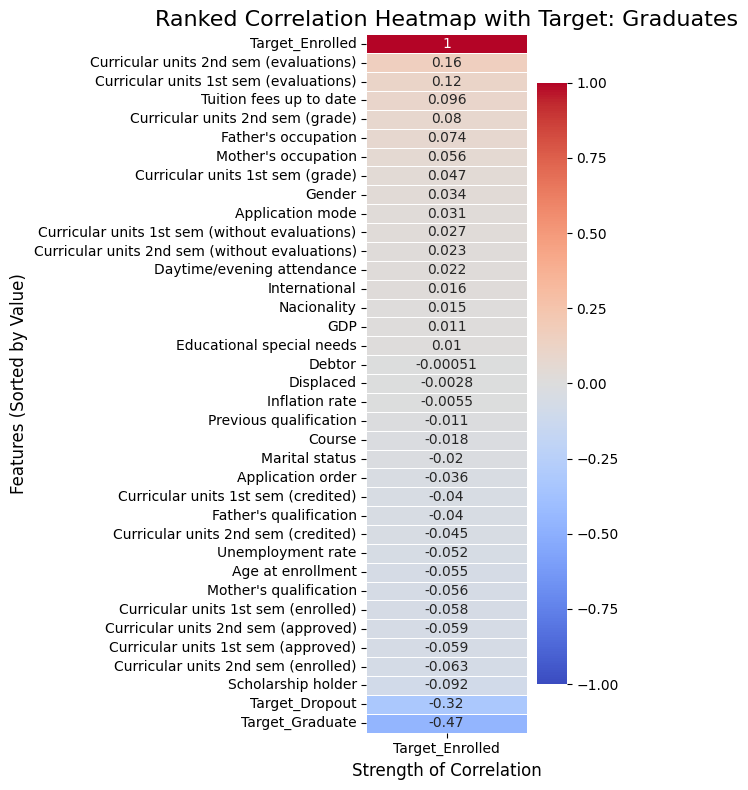

In [175]:
# Sort the correlation coefficients with the target variable Target_Graduate in descending order,
# and visualize the strength of correlations using a heatmap.

sorted_corr = correlation_matrix[['Target_Enrolled']].sort_values(
    by='Target_Enrolled', ascending=False
)


plt.figure(figsize=(6, 8))
sns.heatmap(
    sorted_corr,
    annot=True,
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    vmin=-1,
    vmax=1
)

plt.title("Ranked Correlation Heatmap with Target: Graduates", fontsize=16)
plt.xlabel("Strength of Correlation", fontsize=12)
plt.ylabel("Features (Sorted by Value)", fontsize=12)
plt.tight_layout()
plt.show()


In [176]:
df_factors_encoded.head()
print(df_factors.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [177]:
from sklearn.model_selection import train_test_split


In [178]:
df_factors_sampled = df_factors_encoded.sample(frac=1, random_state=42)
split_index = int(len(df_factors_sampled) * 0.8)
print(split_index)
train_df = df_factors_sampled.iloc[:split_index]
test_df = df_factors_sampled[split_index:]


3539


In [179]:
true_df = train_df[train_df['Target_Graduate']]

false_df = train_df[train_df['Target_Graduate'] == False]

print(len(true_df), len(false_df))

false_df_sampled = false_df.sample(n=len(true_df), random_state=42)



fusion_train_df = pd.concat([true_df, false_df_sampled], ignore_index=True).sample(frac=1, random_state=42)
fusion_train_df

1747 1792


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
1945,1,4,1,2,1,3,1,1,2,10,...,0,0,0.000000,0,9.4,-0.8,-3.12,True,False,False
3363,1,12,1,17,0,1,1,22,27,10,...,0,0,0.000000,0,16.2,0.3,-0.92,True,False,False
2649,1,8,2,10,1,1,1,1,3,4,...,7,6,17.428571,0,11.1,0.6,2.02,True,False,False
1880,1,8,2,5,1,1,1,3,1,3,...,8,1,10.000000,0,10.8,1.4,1.74,False,True,False
2768,1,4,1,1,1,15,1,23,27,6,...,21,12,12.250000,1,11.1,0.6,2.02,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1,4,0,4,1,3,1,1,27,5,...,22,12,13.214286,0,15.5,2.8,-4.06,False,False,True
1130,1,1,1,10,1,1,1,23,27,6,...,7,6,14.428571,0,16.2,0.3,-0.92,False,False,True
1294,1,1,4,9,1,1,1,1,1,4,...,8,5,12.400000,0,11.1,0.6,2.02,False,False,True
860,1,1,1,16,1,1,1,13,10,10,...,7,6,12.333333,0,7.6,2.6,0.32,False,False,True


In [180]:
X_train = fusion_train_df.drop(columns=['Target_Dropout', 'Target_Graduate', 'Target_Enrolled'])
y_train = fusion_train_df['Target_Graduate']

X_test = test_df.drop(columns=['Target_Dropout', 'Target_Graduate', 'Target_Enrolled'])
y_test = test_df['Target_Graduate']

#New Version
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=8, min_samples_split=10, min_samples_leaf=5)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, rf_y_pred):.2f}")

from sklearn.model_selection import cross_val_score
# Assuming X and y were defined earlier for cross-validation, use X_train and y_train instead:
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Random Forest Mean CV Accuracy: {rf_cv_scores.mean():.2f}")

In [181]:
#New Version
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=8, min_samples_split=10, min_samples_leaf=5)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, rf_y_pred):.2f}")

from sklearn.model_selection import cross_val_score
# Assuming X and y were defined earlier for cross-validation, use X_train and y_train instead:
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Random Forest Mean CV Accuracy: {rf_cv_scores.mean():.2f}")

Random Forest Test Accuracy: 0.86
Random Forest Cross-Validation Scores: [0.81974249 0.82832618 0.85264664 0.82403433 0.85386819]
Random Forest Mean CV Accuracy: 0.84


In [182]:
X_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
1945,1,4,1,2,1,3,1,1,2,10,...,0,0,0,0,0,0.000000,0,9.4,-0.8,-3.12
3363,1,12,1,17,0,1,1,22,27,10,...,0,0,5,0,0,0.000000,0,16.2,0.3,-0.92
2649,1,8,2,10,1,1,1,1,3,4,...,0,0,6,7,6,17.428571,0,11.1,0.6,2.02
1880,1,8,2,5,1,1,1,3,1,3,...,0,0,6,8,1,10.000000,0,10.8,1.4,1.74
2768,1,4,1,1,1,15,1,23,27,6,...,0,12,16,21,12,12.250000,1,11.1,0.6,2.02


Accuracy: 0.86
Precision: 0.84
Recall: 0.90
F1 Score: 0.87


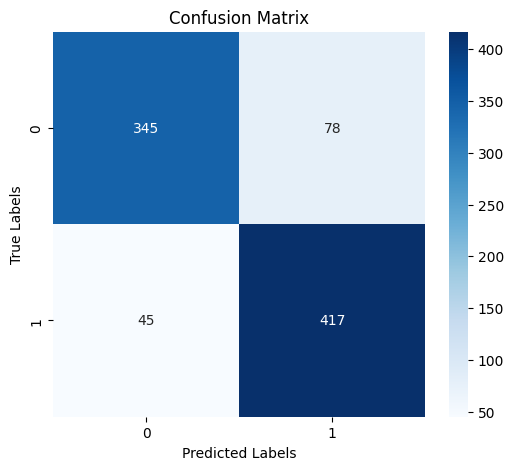

In [183]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions using the Logistic Regression model
y_pred = rf_model.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [184]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.82      0.85       423
        True       0.84      0.90      0.87       462

    accuracy                           0.86       885
   macro avg       0.86      0.86      0.86       885
weighted avg       0.86      0.86      0.86       885



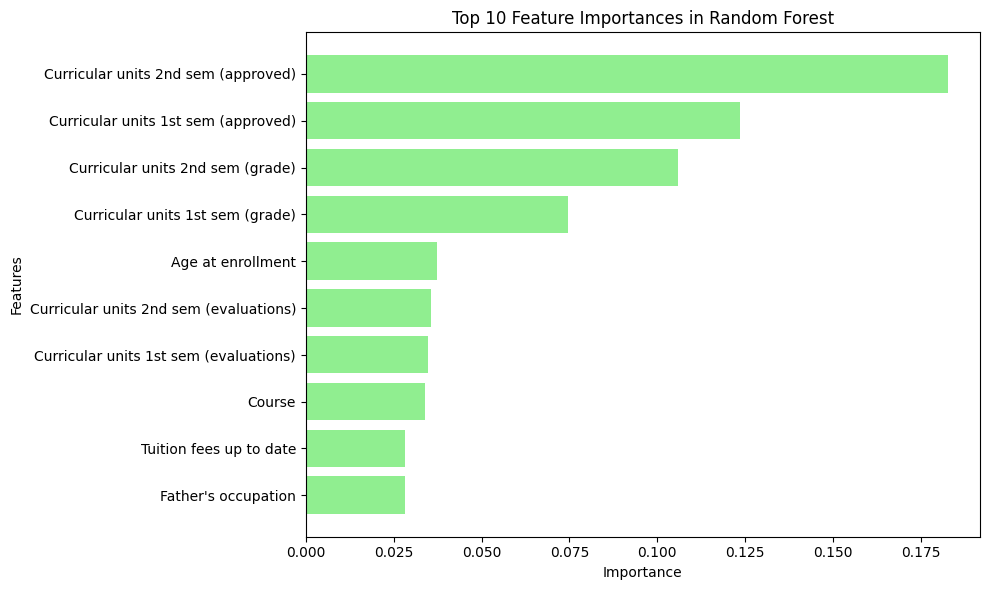

Random Forest Full Feature Importance Ranking:
                                           Feature  Importance
28             Curricular units 2nd sem (approved)    0.182674
22             Curricular units 1st sem (approved)    0.123411
29                Curricular units 2nd sem (grade)    0.105872
23                Curricular units 1st sem (grade)    0.074675
17                               Age at enrollment    0.037232
27          Curricular units 2nd sem (evaluations)    0.035712
21          Curricular units 1st sem (evaluations)    0.034911
3                                           Course    0.033777
14                         Tuition fees up to date    0.028367
10                             Father's occupation    0.028143
16                              Scholarship holder    0.026458
9                              Mother's occupation    0.025202
26             Curricular units 2nd sem (enrolled)    0.023196
31                               Unemployment rate    0.022218
8       

In [185]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importance
rf_feature_importances = rf_model.feature_importances_

# Create DataFrame for feature importance
rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'].head(10), rf_importance_df['Importance'].head(10), color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances in Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print full feature importance ranking
print("Random Forest Full Feature Importance Ranking:")
print(rf_importance_df)


In [186]:
# Ann Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


y_pred_ann = (model.predict(X_test) > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6229 - loss: 0.8944 - val_accuracy: 0.7966 - val_loss: 0.4635
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8069 - loss: 0.4207 - val_accuracy: 0.8215 - val_loss: 0.3995
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8237 - loss: 0.3932 - val_accuracy: 0.8282 - val_loss: 0.3859
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8387 - loss: 0.3664 - val_accuracy: 0.8226 - val_loss: 0.3851
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8374 - loss: 0.3677 - val_accuracy: 0.8362 - val_loss: 0.3606
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8273 - loss: 0.3757 - val_accuracy: 0.8384 - val_loss: 0.3622
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8383 - loss: 0.3555 - val_accuracy: 0.8328 - val_loss: 0.3611
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8383 - loss: 0.3576 - val_accuracy: 0.8339 - val_

XGBoost Accuracy: 0.86
XGBoost Precision: 0.85
XGBoost Recall: 0.89
XGBoost F1 Score: 0.87


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:42:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


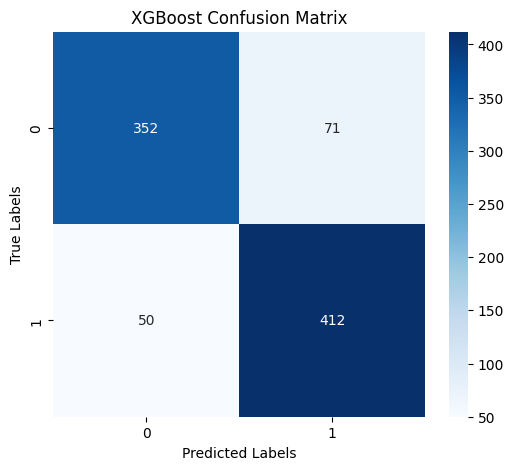

In [187]:
# XGBOOST
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

# Print Metrics
print(f"XGBoost Accuracy: {accuracy:.2f}")
print(f"XGBoost Precision: {precision:.2f}")
print(f"XGBoost Recall: {recall:.2f}")
print(f"XGBoost F1 Score: {f1:.2f}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Combined Analysis
Academic Progress is the Key Factor:

Academic-related features (e.g., course completion, evaluation scores) are shown to be the most significant contributors to graduation outcomes in both charts, emphasizing the dominant role of academic performance.
Economic Factors Matter:

Timely payment of tuition fees (Tuition fees up to date) is highlighted in both charts, suggesting that financial stability has a direct impact on academic success.
The Role of Scholarships Requires Further Investigation:

Although Scholarship holder ranks lower in importance, its negative correlation raises interesting questions, such as whether scholarship recipients face higher academic pressure or other challenges.
Low-Impact Features Can Be Considered for Removal:

Features with minimal influence (e.g., GDP, Inflation rate, Nationality) could be removed to simplify the dataset and improve model efficiency.


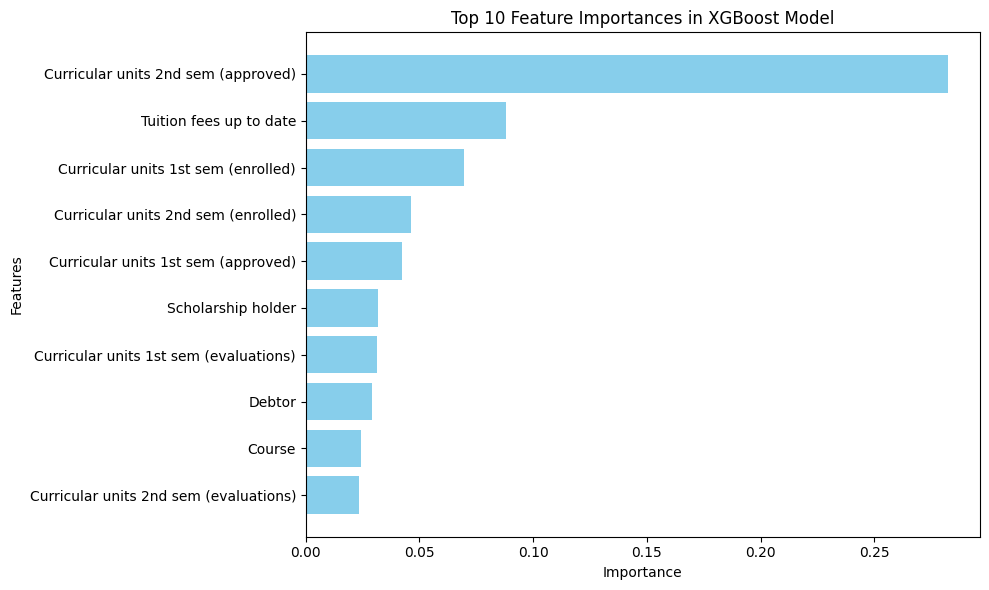

Full Feature Importance Ranking:
                                           Feature  Importance
28             Curricular units 2nd sem (approved)    0.282405
14                         Tuition fees up to date    0.088149
20             Curricular units 1st sem (enrolled)    0.069505
26             Curricular units 2nd sem (enrolled)    0.046179
22             Curricular units 1st sem (approved)    0.042455
16                              Scholarship holder    0.031934
21          Curricular units 1st sem (evaluations)    0.031359
13                                          Debtor    0.029139
3                                           Course    0.024370
27          Curricular units 2nd sem (evaluations)    0.023477
30  Curricular units 2nd sem (without evaluations)    0.020299
32                                  Inflation rate    0.019637
29                Curricular units 2nd sem (grade)    0.018367
15                                          Gender    0.017816
24  Curricular units 1

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


feature_names = X_train.columns


feature_importances = xgb_model.feature_importances_


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

top_features = importance_df.head(10)


plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances in XGBoost Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


print("Full Feature Importance Ranking:")
print(importance_df)


SVM Accuracy: 0.83
SVM Precision: 0.81
SVM Recall: 0.88
SVM F1 Score: 0.84


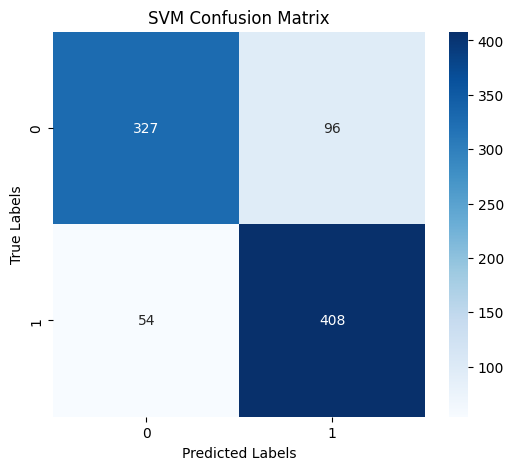

In [189]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train SVM Model
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

# Print Metrics
print(f"SVM Accuracy: {accuracy:.2f}")
print(f"SVM Precision: {precision:.2f}")
print(f"SVM Recall: {recall:.2f}")
print(f"SVM F1 Score: {f1:.2f}")

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


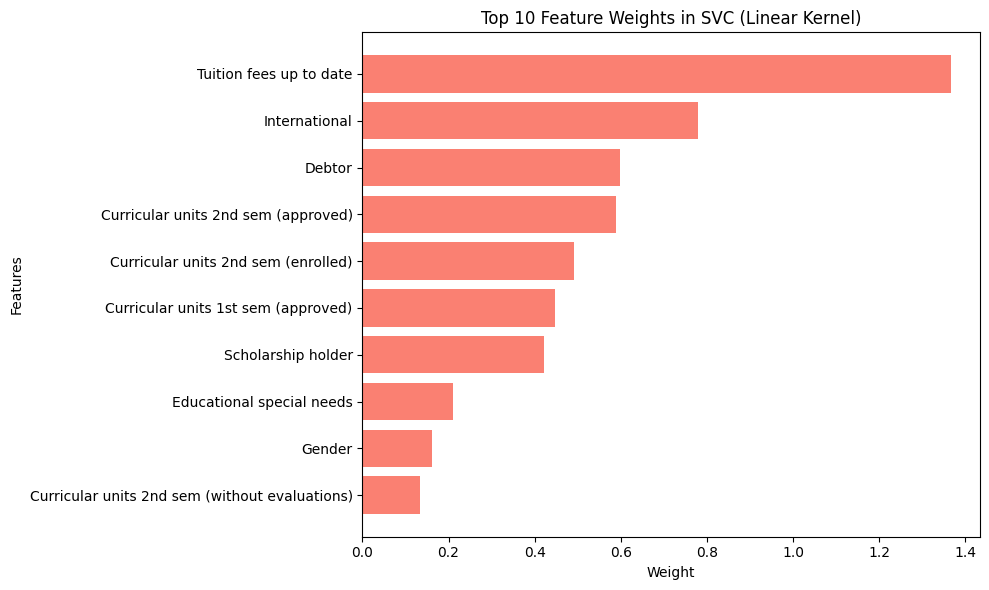

SVM (Linear Kernel) Full Feature Weight Ranking:
                                           Feature    Weight
14                         Tuition fees up to date  1.366112
18                                   International  0.778982
13                                          Debtor  0.598669
28             Curricular units 2nd sem (approved)  0.588375
26             Curricular units 2nd sem (enrolled)  0.490551
22             Curricular units 1st sem (approved)  0.447940
16                              Scholarship holder  0.422177
12                       Educational special needs  0.209329
15                                          Gender  0.161689
30  Curricular units 2nd sem (without evaluations)  0.134062
20             Curricular units 1st sem (enrolled)  0.126384
19             Curricular units 1st sem (credited)  0.119199
4                       Daytime/evening attendance  0.109928
6                                      Nacionality  0.090920
29                Curricular units 2

In [190]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Train SVM with linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Extract feature weights (only for linear kernel)
svm_feature_weights = np.abs(svm_model.coef_[0])

# Create DataFrame for feature weights
svm_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Weight': svm_feature_weights
}).sort_values(by='Weight', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(svm_importance_df['Feature'].head(10), svm_importance_df['Weight'].head(10), color='salmon')
plt.xlabel('Weight')
plt.ylabel('Features')
plt.title('Top 10 Feature Weights in SVC (Linear Kernel)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print full feature weight ranking
print("SVM (Linear Kernel) Full Feature Weight Ranking:")
print(svm_importance_df)


In [191]:
print(df_factors_encoded['Target_Graduate'].value_counts())

Target_Graduate
False    2215
True     2209
Name: count, dtype: int64


In [192]:
print(df_factors_encoded['Target_Dropout'].value_counts())

Target_Dropout
False    3003
True     1421
Name: count, dtype: int64


In [193]:
# SMOTE for unbalence dataset
from imblearn.over_sampling import SMOTE

X = df_factors_encoded.drop(columns=['Target_Dropout'])
y = df_factors_encoded['Target_Dropout']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())
# False: 3003, True: 3003

Target_Dropout
True     3003
False    3003
Name: count, dtype: int64


In [194]:
import pandas as pd

summary = pd.DataFrame({
    'Target': ['Graduate', 'Dropout'],
    'False': [df_factors_encoded['Target_Graduate'].value_counts()[0], df_factors_encoded['Target_Dropout'].value_counts()[0]],
    'True': [df_factors_encoded['Target_Graduate'].value_counts()[1], df_factors_encoded['Target_Dropout'].value_counts()[1]]
})
print(summary)

     Target  False  True
0  Graduate   2215  2209
1   Dropout   3003  1421


<ipython-input-194-eb0025f525ad>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'False': [df_factors_encoded['Target_Graduate'].value_counts()[0], df_factors_encoded['Target_Dropout'].value_counts()[0]],
<ipython-input-194-eb0025f525ad>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'True': [df_factors_encoded['Target_Graduate'].value_counts()[1], df_factors_encoded['Target_Dropout'].value_counts()[1]]
